# Effects of Loan Features on Borrower Rate
## by Ezekiel Ifeoluwa Deborah

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv(r'C:\Users\HP\Desktop\project 3\LoanData.csv')

In [4]:
# Convert IncomeRange from string to categorical datatype, ProsperRating(Alpha) from string to categorical datatype, EmploymentStatus from a string to a categorical datatype
ordinal_var_dict = {'IncomeRange': ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                   '$75,000-99,999','$100,000+'],
                     'ProsperRating': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                     'EmploymentStatus': ['Employed', 'Full-time', 'Self-employed', 'Not available', 'Other',  'Part-time', 'Not employed', 'Retired'],
                     'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}  
                    
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var) 

In [5]:
loans['IsBorrowerHomeowner'] = loans['IsBorrowerHomeowner'].astype('category')
loans['ListingCategory'] = loans['ListingCategory'].astype('category')
loans['EmploymentStatusDuration'] = loans['EmploymentStatusDuration'].astype('int')
loans['CreditScoreRange'] = loans['CreditScoreRange'].astype(int)


In [ ]:
loans.dtypes

Unnamed: 0                     int64
ListingNumber                  int64
Term                           int64
BorrowerRate                 float64
ListingCategory             category
BorrowerState                 object
Occupation                    object
ProsperRating               category
ProsperScore                category
EmploymentStatus            category
EmploymentStatusDuration       int32
IsBorrowerHomeowner         category
CreditScoreRange               int32
DebtToIncomeRatio            float64
IncomeRange                 category
LoanOriginalAmount             int64
dtype: object

## Distribution of Borrower Rate

> The distribution of borrower rate is long tailed with a very high peak at 0.32%. Most of the borrowers have a borrower rate of 0.32% and below


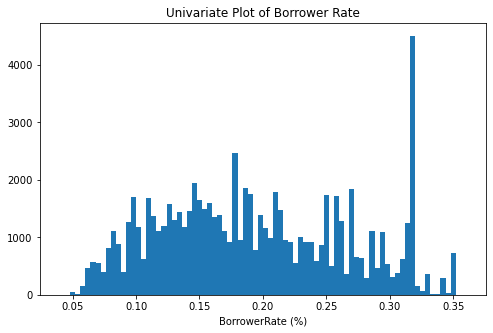

In [6]:
# an histogram plot of the BorrowerRate
binsize = 0.004
plt.figure(figsize = [8,5])
bins = np.arange(0.04, loans['BorrowerRate'].max()+binsize, binsize)
plt.hist(data=loans, x = 'BorrowerRate', bins = bins)
plt.xlabel('BorrowerRate (%)')
plt.title('Univariate Plot of Borrower Rate');

## Ditribution of Prosper Score

> The Prosper score estimates the probability of a loan going “bad,” where “bad” is the probability of going 60+ days past due within the first twelve months from the date of loan origination. The Prosper score ranges from 1-10 with 10 being the best or lowest prosper score.
The distribution of prosper score is trimodal with peaks at levels 4, 6 and 8
The most freequent prosper scores fall between 4 and 8

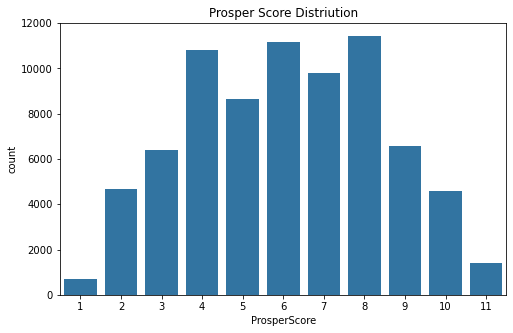

In [7]:
# univariate plots of ProsperRatings and PrrosperScore
base_color = sb.color_palette()[0]
plt.figure(figsize = [8,5])
sb.countplot(data=loans, x='ProsperScore',color=base_color)
plt.title('Prosper Score Distriution');

## Distribution of Credit Score Range

Credit Scores are three digit numbers, typically between 300 and 900, designed to represent your credit risk, or the likelihood you will pay your bills on time. Those with higher credit scores generally recieve more favorable credit terms, which may translate into lower payments and lower Borrower Rates.<br>
Credit scores ranges vary based on the credit scoring model used, but are generally similar to the following:
- Poor: 300-579
- Fair: 580-699
- Good: 670-739 
- Very good:  740-799 
- Excellent: => 800 

There is a high level of frequency from between approximately 680 to 725 after which it reduces and the distribution slopes downwards.<br>
Most of the borrowers have a between good and excellent credit scores.

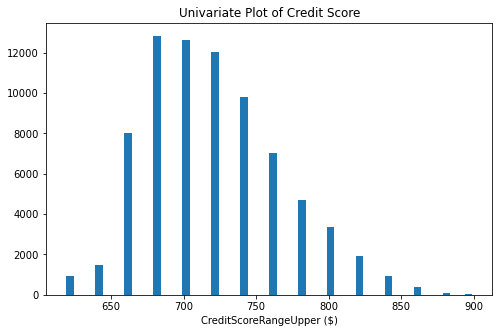

In [8]:
# histogram to show CreditScoreRange distribution
binsize = 5
plt.figure(figsize = [8,5])
bins = np.arange(619, loans['CreditScoreRange'].max()+binsize, binsize)
plt.hist(data=loans, x = 'CreditScoreRange', bins = bins)
plt.xlabel('CreditScoreRangeUpper ($)')
plt.title('Univariate Plot of Credit Score');

## Borrower Rate by Prosper Score
Prosper score have a strong negative relationship, as prosper score reduces , borrower rate increases. The higher(i.e the better) a borrower's prosper score the lower their borrower rate.

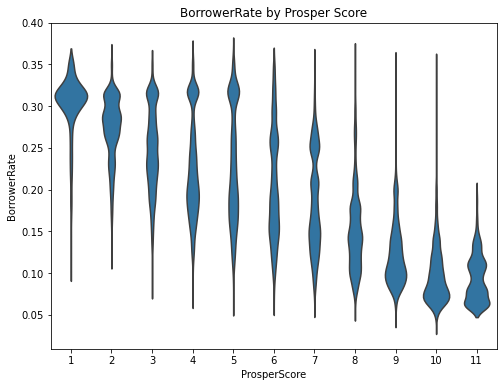

In [9]:
plt.figure(figsize=[8,6])
base_color = sb.color_palette()[0]
sb.violinplot(data=loans, x='ProsperScore', y='BorrowerRate', color=base_color, inner=None)
plt.title('BorrowerRate by Prosper Score');


## Borrower Rate by Credit Score
There's a high relationship between ProsperScore and CreditScoreRange. This means that borrowers with high prosper scores also have high a high CreditScoreRange.<br>


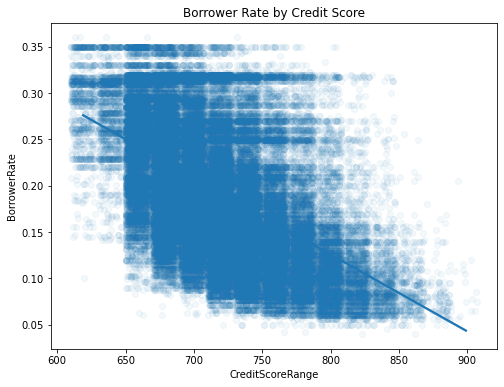

In [10]:
plt.figure(figsize=[8,6]);
sb.regplot(data=loans, x='CreditScoreRange', y='BorrowerRate', x_jitter=9, scatter_kws=({'alpha':1/20}));
plt.title('Borrower Rate by Credit Score');


## Borrower Rate by Prosper Score and Loan Term
 Borrowers with higher(i.e better) ProsperScore and longer loan terms are more likely to get lower Borrower Rate

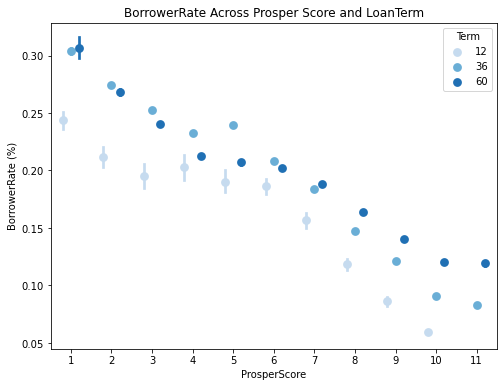

In [11]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans, x = 'ProsperScore', y = 'BorrowerRate', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('BorrowerRate Across Prosper Score and LoanTerm')
plt.ylabel('BorrowerRate (%)')
plt.xlabel('ProsperScore')
plt.show();

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt


[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 868959 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\HP\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  Fil